In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [12]:
nombre_archivo = "planta0.json"
with open(nombre_archivo, "r") as file:
    costos = json.load(file)

In [13]:
costo_transporte = [value["costo_transporte"] for value in costos.values()]
costo_inventario = [value["costo_inventario"] for value in costos.values()]
costo_quiebre_stock = [value["costo_quiebre_stock"] for value in costos.values()]

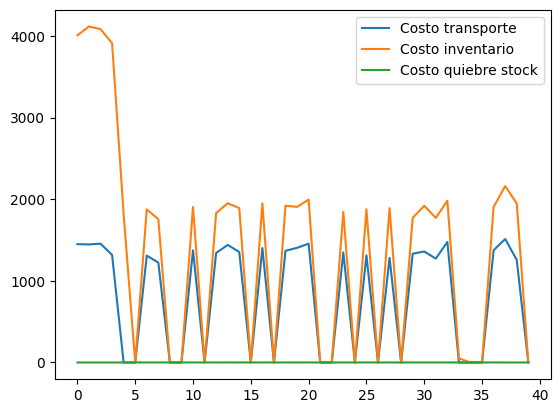

In [14]:
#mostrar grafico de costos por dia de transporte, inventario y quiebre de stock
plt.plot(costo_transporte, label="Costo transporte")
plt.plot(costo_inventario, label="Costo inventario")
plt.plot(costo_quiebre_stock, label="Costo quiebre stock")
plt.legend()
plt.show()